In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
%matplotlib inline

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn
import mglearn
from IPython.display import display
import os
import seaborn as sns
sns.set_style("darkgrid")
fig=plt.figure(facecolor="w")
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>")) 

import pandas as pd

<Figure size 432x288 with 0 Axes>

In [4]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)

print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


/Users/sen/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/matplotlib/pyplot.py:2790: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


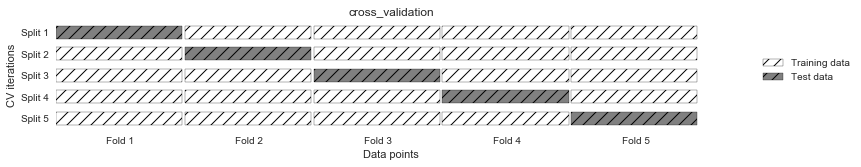

In [5]:
mglearn.plots.plot_cross_validation()

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96078431 0.92156863 0.95833333]


In [9]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.         0.96666667 0.93333333 0.9        1.        ]


In [10]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/Users/sen/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/mglearn/plot_cross_validation.py:121: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color=colors, hatch="//", edgecolor='k', align='edge')
/Users/sen/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/mglearn/plot_cross_validation.py:125: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align='edge')
/Users/sen/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/mglearn/plot_cross_validation.py:158: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  height=.6, color="grey", hatch="//", edgecolor='k', align='edge')
/Users/sen/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/

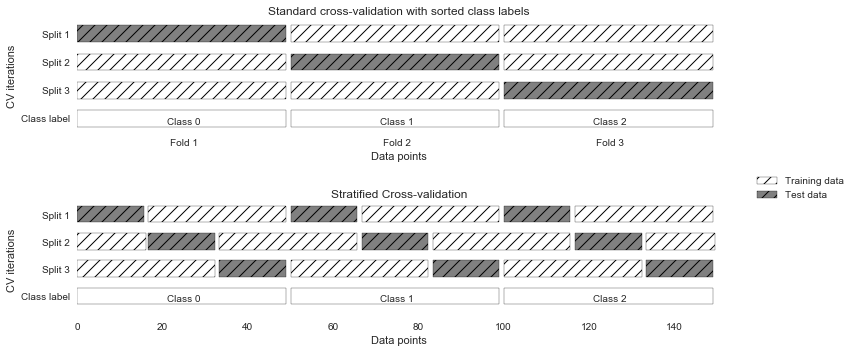

In [13]:
mglearn.plots.plot_stratified_cross_validation()

In [15]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         0.93333333 0.43333333 0.96666667 0.43333333]


In [17]:
kfold = KFold(n_splits=3)
print("cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

cross-validation scores:
[0. 0. 0.]


In [18]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

cross-validation scores:
[0.9  0.96 0.96]


In [20]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ",len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))      

Number of cv iterations:  150
Mean accuracy: 0.95


/Users/sen/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/mglearn/plot_cross_validation.py:85: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor='k', align='edge')


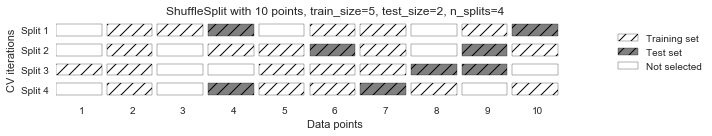

In [21]:
mglearn.plots.plot_shuffle_split()

In [22]:

from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.94666667 0.93333333 0.89333333 0.89333333 0.93333333 0.85333333
 0.93333333 0.93333333 0.92       0.86666667]


In [24]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.8        0.66666667]


In [27]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {}  size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112  size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


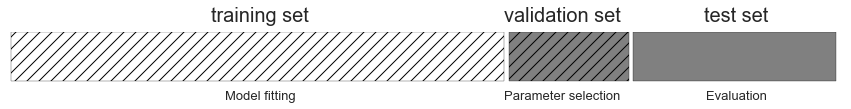

In [28]:
mglearn.plots.plot_threefold_split()

In [32]:
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Size of training set : {}  size of validation set : {}  size of test set : {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {} ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set : 84  size of validation set : 28  size of test set : 38

Best score on validation set: 0.96
Best parameters: {}  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [33]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

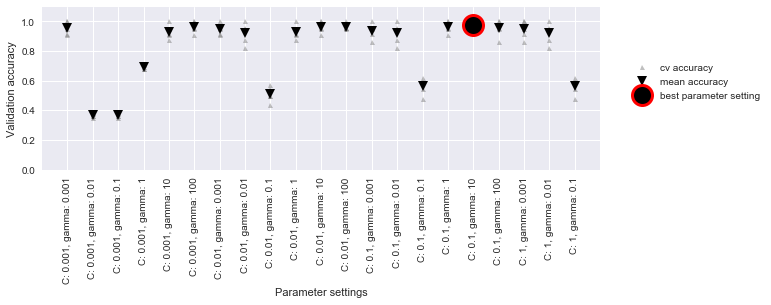

In [34]:
mglearn.plots.plot_cross_val_selection()

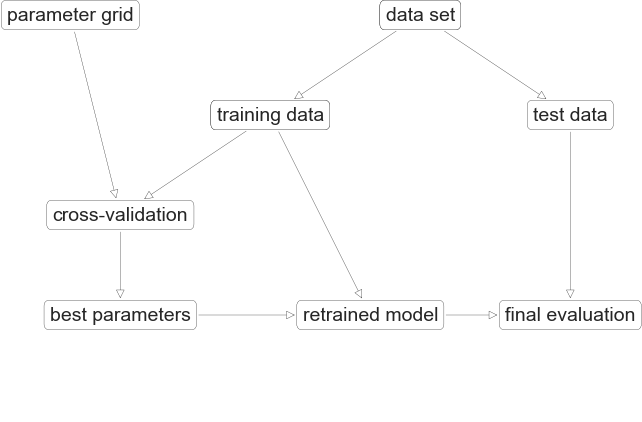

In [35]:
mglearn.plots.plot_grid_search_overview()

In [36]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100], "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)
print("Test set score: {}".format(grid_search.score(X_test, y_test)))

Test set score: 0.9736842105263158


In [41]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.9732142857142857


In [42]:
print("Best estimater:\n{}".format(grid_search.best_estimator_))

Best estimater:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [43]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.002150,0.000733,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.001044,0.000359,0.011371,0.002852
1,0.001581,0.000675,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000599,0.000177,0.011371,0.002852
2,0.001308,0.000640,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000454,0.000265,0.011371,0.002852
3,0.001551,0.000495,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000739,0.000223,0.011371,0.002852
4,0.000805,0.000308,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000199,0.000084,0.011371,0.002852


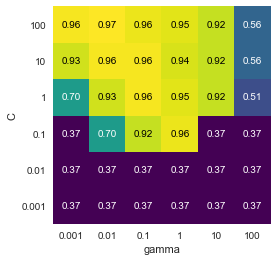

In [45]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel="gamma", xticklabels=param_grid["gamma"], ylabel="C", yticklabels=param_grid["C"], cmap="viridis")

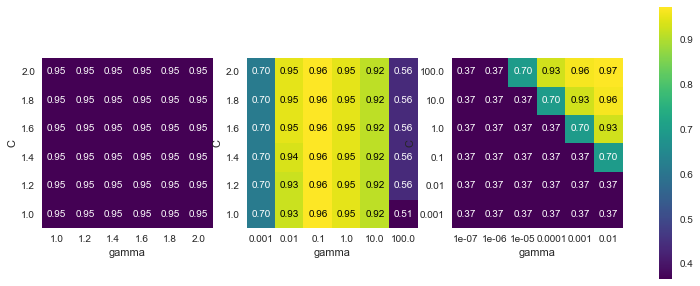

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {"C": np.linspace(1, 2, 6), "gamma": np.linspace(1, 2, 6)}

param_grid_one_log = {"C": np.linspace(1, 2, 6), "gamma": np.logspace(-3, 2, 6)}

param_grid_range = {"C": np.logspace(-3, 2, 6), "gamma": np.logspace(-7, -2, 6)}

for param_grid, ax in zip ([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_["mean_test_score"].reshape(6, 6)
    
    scores_image = mglearn.tools.heatmap(scores, xlabel="gamma", ylabel="C", xticklabels=param_grid["gamma"], yticklabels=param_grid["C"], cmap="viridis", ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

In [49]:
param_grid = [{"kernel": ["rbf"], "C": [0.001, 0.01, 0.1, 1, 10, 100], "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}, {"kernel": ["linear"], "C": [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}]


In [50]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'kernel': 'rbf', 'gamma': 0.01}
Best cross-validation score: 0.9732142857142857


In [51]:
results = pd.DataFrame(grid_search.cv_results_)

display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00118198,0.000797796,0.000629616,0.000722361,0.000639343,0.00069561,0.000713825,0.000767612,0.000672531,0.000605965,...,0.000847578,0.000494337,0.00101919,0.000870037,0.000661182,0.000477743,0.000392246,0.00046711,0.000355291,0.000433588
mean_score_time,0.000422955,0.000337648,0.000236797,0.000293112,0.000285196,0.000270271,0.000278568,0.000270176,0.000279617,0.000228214,...,0.000426579,0.000211239,0.000393343,0.000285006,0.000328445,0.000221014,0.000218773,0.000269413,0.000197268,0.000273228
mean_test_score,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,...,0.955357,0.946429,0.919643,0.5625,0.366071,0.848214,0.946429,0.973214,0.964286,0.964286
mean_train_score,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,...,0.988788,1,1,1,0.366079,0.855069,0.966538,0.984368,0.988813,0.993258
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'kernel': 'rbf', 'gamma': 0.001}","{'C': 0.001, 'kernel': 'rbf', 'gamma': 0.01}","{'C': 0.001, 'kernel': 'rbf', 'gamma': 0.1}","{'C': 0.001, 'kernel': 'rbf', 'gamma': 1}","{'C': 0.001, 'kernel': 'rbf', 'gamma': 10}","{'C': 0.001, 'kernel': 'rbf', 'gamma': 100}","{'C': 0.01, 'kernel': 'rbf', 'gamma': 0.001}","{'C': 0.01, 'kernel': 'rbf', 'gamma': 0.01}","{'C': 0.01, 'kernel': 'rbf', 'gamma': 0.1}","{'C': 0.01, 'kernel': 'rbf', 'gamma': 1}",...,"{'C': 100, 'kernel': 'rbf', 'gamma': 0.1}","{'C': 100, 'kernel': 'rbf', 'gamma': 1}","{'C': 100, 'kernel': 'rbf', 'gamma': 10}","{'C': 100, 'kernel': 'rbf', 'gamma': 100}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
rank_test_score,27,27,27,27,27,27,27,27,27,27,...,9,11,17,24,27,21,11,1,3,3
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333


In [53]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)

print("Cross-validation scores: ",scores)
print("Mean cross-validation score: ",scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


In [54]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    
    for training_samples, test_samples in outer_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        
        for parameters in parameter_grid:
            cv_scores = []
            
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
                
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
                
        clf = Classifier(**best_parameters)
        clf.fit(X[training_samples], y[training_samples])
            
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
            
    return np.array(outer_scores)

In [55]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))

print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [56]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [57]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.8955555555555555


In [59]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score* {}".format(tree.score(X_test, y_test)))

Test score* 0.9177777777777778


In [63]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {}".format(logreg.score(X_test, y_test)))

dummy score: 0.8177777777777778
logreg score: 0.9777777777777777


In [65]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


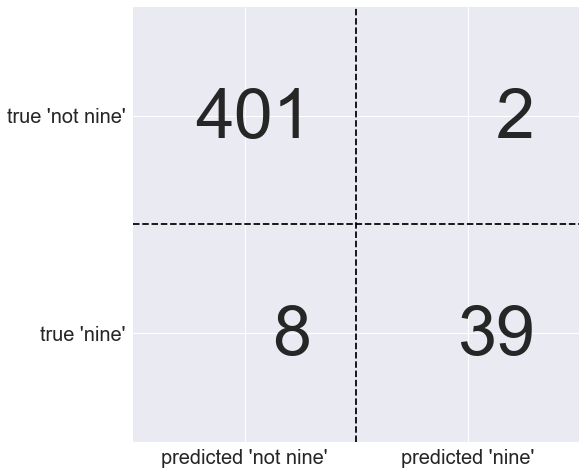

In [66]:
mglearn.plots.plot_confusion_matrix_illustration()

In [67]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\ndummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecison tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

dummy model:
[[356  47]
 [ 44   3]]

Decison tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


In [68]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.0
f1 score dummy: 0.06185567010309278
f1 score tree: 0.5542168674698795
f1 score logistic regression: 0.8863636363636364


/Users/sen/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/Users/sen/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.89      0.88      0.89       403
       nine       0.06      0.06      0.06        47

avg / total       0.80      0.80      0.80       450



In [71]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



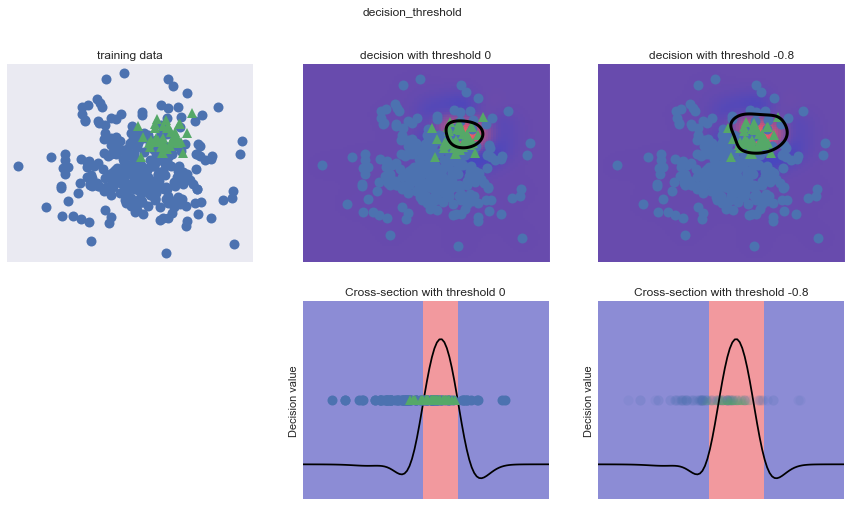

In [72]:
mglearn.plots.plot_decision_threshold()

In [81]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [82]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



In [84]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))



Text(0,0.5,'Recall')

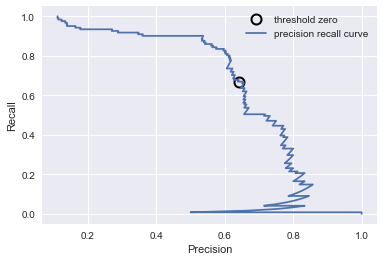

In [94]:
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

close_zore = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zore], recall[close_zore], "o", markersize=10, label="threshold zero", fillstyle="none", c="k", mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Recall")

Text(0,0.5,'Recall')

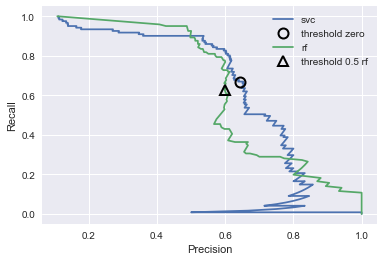

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zore], recall[close_zore], "o", markersize=10, label="threshold zero", fillstyle="none", c="k", mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], "^", c="k", markersize="10", label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.legend(loc="best")
plt.xlabel("Precision")
plt.ylabel("Recall")

In [96]:
print("f1_score of random forest: {}".format(f1_score(y_test, rf.predict(X_test))))
print("f1 score of svc: {}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.6097560975609757
f1 score of svc: 0.6558704453441295


In [97]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {}".format(ap_rf))
print("Average precision of svc: {}".format(ap_svc))


Average precision of random forest: 0.6657371713257989
Average precision of svc: 0.6626357978847589


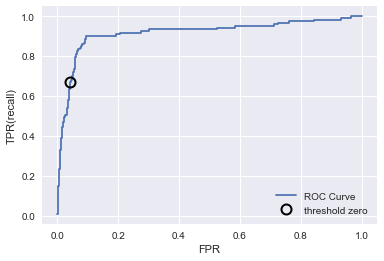

In [99]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")

close_zero = np.argmin(np.abs(thresholds))

plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize=10, label="threshold zero", fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

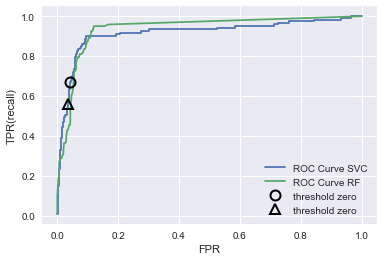

In [100]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")

plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize=10, label="threshold zero", fillstyle="none", c="k", mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr[close_default_rf], tpr[close_default_rf], "^", markersize=10, label="threshold zero", fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

In [103]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {}".format(rf_auc))
print("AUC for SVC: {}".format(svc_auc))

AUC for Random Forest: 0.9366953672911658
AUC for SVC: 0.9162935036712655


gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


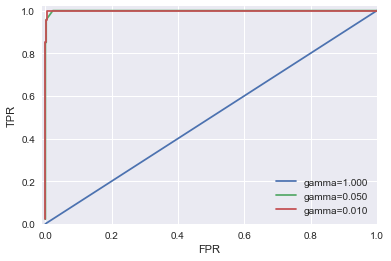

In [107]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
    
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

In [108]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


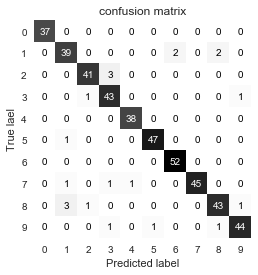

In [116]:
score_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel="Predicted label", ylabel="True lael",\
                                    xticklabels=digits.target_names, yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("confusion matrix")
plt.gca().invert_yaxis()

In [117]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [118]:
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


In [120]:
print("WDefault scoring: {}".format(cross_val_score(SVC(), digits.data, digits.target == 9)))

explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy")

print("Explicit accuracy acoring: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

WDefault scoring: [0.89983306 0.89983306 0.89983306]
Explicit accuracy acoring: [0.89983306 0.89983306 0.89983306]
AUC scoring: [0.99372294 0.98957947 0.99594929]


In [122]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

param_grid = {"gamma": [0.0001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy): {}".format(grid.best_score_))
print("Test set AUC: {}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy): 0.9703043801039347
Test set AUC: 0.9919222849902327
Test set accuracy: 0.9733333333333334


In [123]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("Grid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {}".format(grid.best_score_))
print("Test set AUC: {}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {}".format(grid.score(X_test, y_test)))

Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.997467845027512
Test set AUC: 0.999524840293543
Test set accuracy: 0.999524840293543


In [124]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(SCORERS.keys()))

Available scorers:
dict_keys(['precision_micro', 'average_precision', 'neg_log_loss', 'recall_macro', 'neg_median_absolute_error', 'median_absolute_error', 'precision_weighted', 'precision', 'f1_macro', 'mean_absolute_error', 'neg_mean_absolute_error', 'f1_weighted', 'precision_macro', 'precision_samples', 'recall_weighted', 'neg_mean_squared_error', 'mean_squared_error', 'log_loss', 'f1_micro', 'accuracy', 'roc_auc', 'f1', 'f1_samples', 'recall_micro', 'adjusted_rand_score', 'recall_samples', 'recall', 'r2'])
